project source: https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data?utm_medium=email&utm_source=mailchimp&utm_campaign=5DDC-data-cleaning

In [1]:
import pandas as pd
import numpy as np

In [19]:
# for Box-Cos Transforation --> for normalization
from scipy import stats

# for min max scaling --> for scaling
from mlxtend.preprocessing import minmax_scaling

# plotting lib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ksp_2018 = pd.read_csv("ks-projects-201801.csv")

In [4]:
# set seed for reproducibility 
# with np.random.seed(0), the same set of numbers will appear every time for np.random.rand(4)
# used to reproduce specific set of numbers multiple times for debugging purpose
np.random.seed(0)

Terms Scaling and Nomalization are used interchangeably sometimes. Both cases, we are __transforming the values of numeric variables__ so that the transformed data points have __specific helpful properties__. <br>
<br>
Difference: 
- Scaling
    - changing the range of data so that the dataset fits within a specific sale like 0-100 or 0-1
    - helps to compare different variables on equal footing like 1 USD with 100 Yen
- Normalization
    - changing the shape of distribution of data so that the dataset can be described as Normal Distribution (Bell Curve, Gaussian Distribution)
    - normalize data to use Machine Learning or Statistics technique(t-test, ANOVAs, Linear Regression, Linear Discriminant Analysis, Gaussian Naive Bayes) that assumes data is normally distrubuted
    
### Scaling

In [15]:
%matplotlib inline

In [17]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max SCALE the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

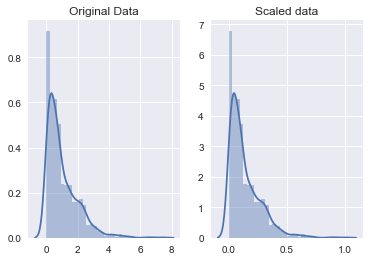

In [18]:
# plot both together to compare
fig, ax = plt.subplots(1,2)

sns.distplot(original_data, ax = ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax = ax[1])
ax[1].set_title("Scaled data")

The shape of the data doesn't change, instead, dataset ranges from 0 to 8ish before, but now it ranges from 0 to 1.

__Scaling the Kickstarter campaigns dataset__ <br>
<br>
__Scaling Values from usd_goal_real Column__

In [30]:
ksp_2018.sample()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
203121,2034335107,Colored Pencils,Shorts,Film & Video,DKK,2017-04-22,7000.0,2017-03-27 13:36:22,2649.0,canceled,6,DK,94.23,389.25,1028.59


In [24]:
# select the usd_goal_real column
original_usdGoal = ksp_2018.usd_goal_real

# scale the goals from 0 to 1
scaled_usdGoal = minmax_scaling(original_usdGoal, columns = [0])

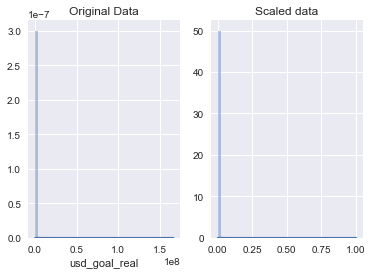

In [25]:
# plot both together to compare
fig, ax = plt.subplots(1,2)

sns.distplot(original_usdGoal, ax = ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_usdGoal, ax = ax[1])
ax[1].set_title("Scaled data")

In [44]:
# the plot looks very scewed, so I want to see how they are
print (original_usdGoal.min())
print (original_usdGoal.max())
print (original_usdGoal.median())

0.01
166361390.71
5500.0


In [53]:
# there are no null value in this column 
original_usdGoal.shape[0] == original_usdGoal.count()

True

__Normalizing Values from Goal Column__

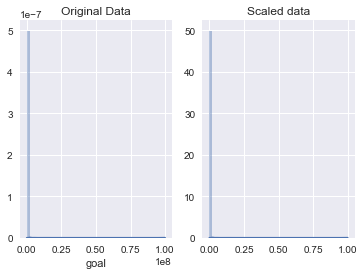

In [55]:
# select the usd_goal_real column
original_goal = ksp_2018.goal

# scale the goals from 0 to 1
scaled_goal = minmax_scaling(original_goal, columns = [0])

# plot both together to compare
fig, ax = plt.subplots(1,2)

sns.distplot(original_goal, ax = ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_goal, ax = ax[1])
ax[1].set_title("Scaled data")

### Normalization

In [20]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

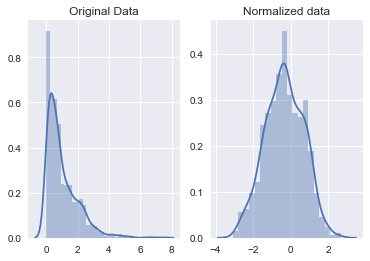

In [21]:
# plot both together to compare
fig, ax=plt.subplots(1,2)

sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

The shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").
<br>

__Normalizing the Kickstarter campaigns dataset__ 
<br><br>
__Normalizing Values from usd_pledged_real Column__

In [56]:
original_pledged = ksp_2018.usd_pledged_real

print (original_pledged .min())
print (original_pledged .max())
print (original_pledged .median())

0.0
20338986.27
624.33


In [58]:
# get the index of all positive pledges 
posPledge_idx = ksp_2018.usd_pledged_real > 0

# get only positive pledges, Box-Cox only takes postive values
posPledges = ksp_2018.usd_pledged_real.loc[posPledge_idx]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(posPledges)[0]

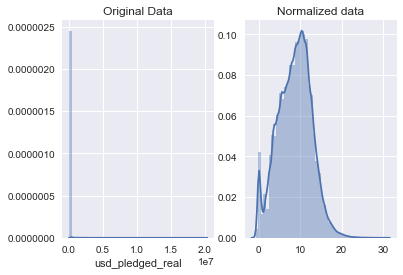

In [60]:
# plot both together to compare
fig, ax=plt.subplots(1,2)

sns.distplot(posPledges, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

Q1: You want to build a __linear regression model__ to predict someone's grades given how much time they spend on various activities during a normal school week. You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying and others study for four or more hours every day. Should you scale or normalize this variable?

A1: Normalize

<br>

Q2: You're still working on your grades study, but you want to include information on how students perform on __several fitness tests__ as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that __students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10.__ Should you scale or normalize these variables?

A2: Scale